In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
import seaborn as sns
from itertools import combinations
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
pd.set_option('display.max_rows', None)

In [31]:
#voc_clip = pd.read_csv('./voc_mlt_only_contrastive_loss_onvoc_mlt_valid_2000_all.csv')
#voc_asl = pd.read_csv('./voc_mlt_only_asl_loss_onvoc_mlt_valid_2000_all.csv')
voc_ours = pd.read_csv('runs/voc_mlt_vitb16_nocaptions_bal/voc_mlt_vitb16_nocaptions_bal_onvoc_mlt_valid.csv')

In [32]:
filtered_counts = voc_ours.groupby('labels').count()
sorted_filtered_counts = filtered_counts.sort_values(by = 'labels', ascending = False)
single_label_counts = sorted_filtered_counts[sorted_filtered_counts.index.str.count(',') == 0]

In [33]:
print(filtered_counts)

                                                      x    y
labels                                                      
aeroplane(TAIL)                                     169  169
aeroplane(TAIL),bus(TAIL)                             2    2
aeroplane(TAIL),bus(TAIL),car(HEAD),pottedplant...    1    1
aeroplane(TAIL),car(HEAD)                             5    5
aeroplane(TAIL),car(HEAD),motorbike(MIDDLE)           1    1
aeroplane(TAIL),car(HEAD),person(HEAD)                3    3
aeroplane(TAIL),person(HEAD)                         24   24
bicycle(MIDDLE)                                      76   76
bicycle(MIDDLE),boat(TAIL)                            1    1
bicycle(MIDDLE),bottle(HEAD)                          1    1
bicycle(MIDDLE),bottle(HEAD),person(HEAD)             2    2
bicycle(MIDDLE),bottle(HEAD),sofa(MIDDLE)             1    1
bicycle(MIDDLE),bus(TAIL),car(HEAD),person(HEAD)      4    4
bicycle(MIDDLE),bus(TAIL),person(HEAD)                2    2
bicycle(MIDDLE),car(HEAD

In [34]:
# 필터링 및 정렬된 라벨 추출
filtered_labels = sorted(single_label_counts.index.tolist())

# 라벨 개수에 맞는 색상 팔레트 생성
num_labels = len(filtered_labels)
cmap = cm.get_cmap('hsv', num_labels)

# 컬러맵에서 색상 추출
custom_colors = [cmap(i) for i in range(num_labels)]

# 라벨과 색상을 매핑합니다.
c_dict = {label: color for label, color in zip(filtered_labels, custom_colors)}
print(c_dict)

{'aeroplane(TAIL)': (1.0, 0.0, 0.0, 1.0), 'bicycle(MIDDLE)': (1.0, 0.31085557401346875, 0.0, 1.0), 'bird(TAIL)': (1.0, 0.6217111480269375, 0.0, 1.0), 'boat(TAIL)': (1.0, 0.9325667220404062, 0.0, 1.0), 'bottle(HEAD)': (0.756577703946125, 1.0, 0.0, 1.0), 'bus(TAIL)': (0.44572212993265614, 1.0, 0.0, 1.0), 'car(HEAD)': (0.1348665559191874, 1.0, 0.0, 1.0), 'cat(MIDDLE)': (0.0, 1.0, 0.1759883031172566, 1.0), 'chair(HEAD)': (0.0, 1.0, 0.4868419187509885, 1.0), 'cow(TAIL)': (0.0, 1.0, 0.7976955343847204, 1.0), 'diningtable(HEAD)': (0.0, 0.8914501661212186, 1.0, 1.0), 'dog(MIDDLE)': (0.0, 0.5805945921077499, 1.0, 1.0), 'horse(TAIL)': (0.0, 0.26973901809428114, 1.0, 1.0), 'motorbike(MIDDLE)': (0.04111655591918671, 0.0, 1.0, 1.0), 'person(HEAD)': (0.3519721299326562, 0.0, 1.0, 1.0), 'pottedplant(HEAD)': (0.6628277039461252, 0.0, 1.0, 1.0), 'sheep(TAIL)': (0.9703944259865314, 0.0, 0.9967111480269372, 1.0), 'sofa(MIDDLE)': (1.0, 0.0, 0.7154611480269382, 1.0), 'train(TAIL)': (1.0, 0.0, 0.40460557401

/tmp/ipykernel_428386/2166152533.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('hsv', num_labels)


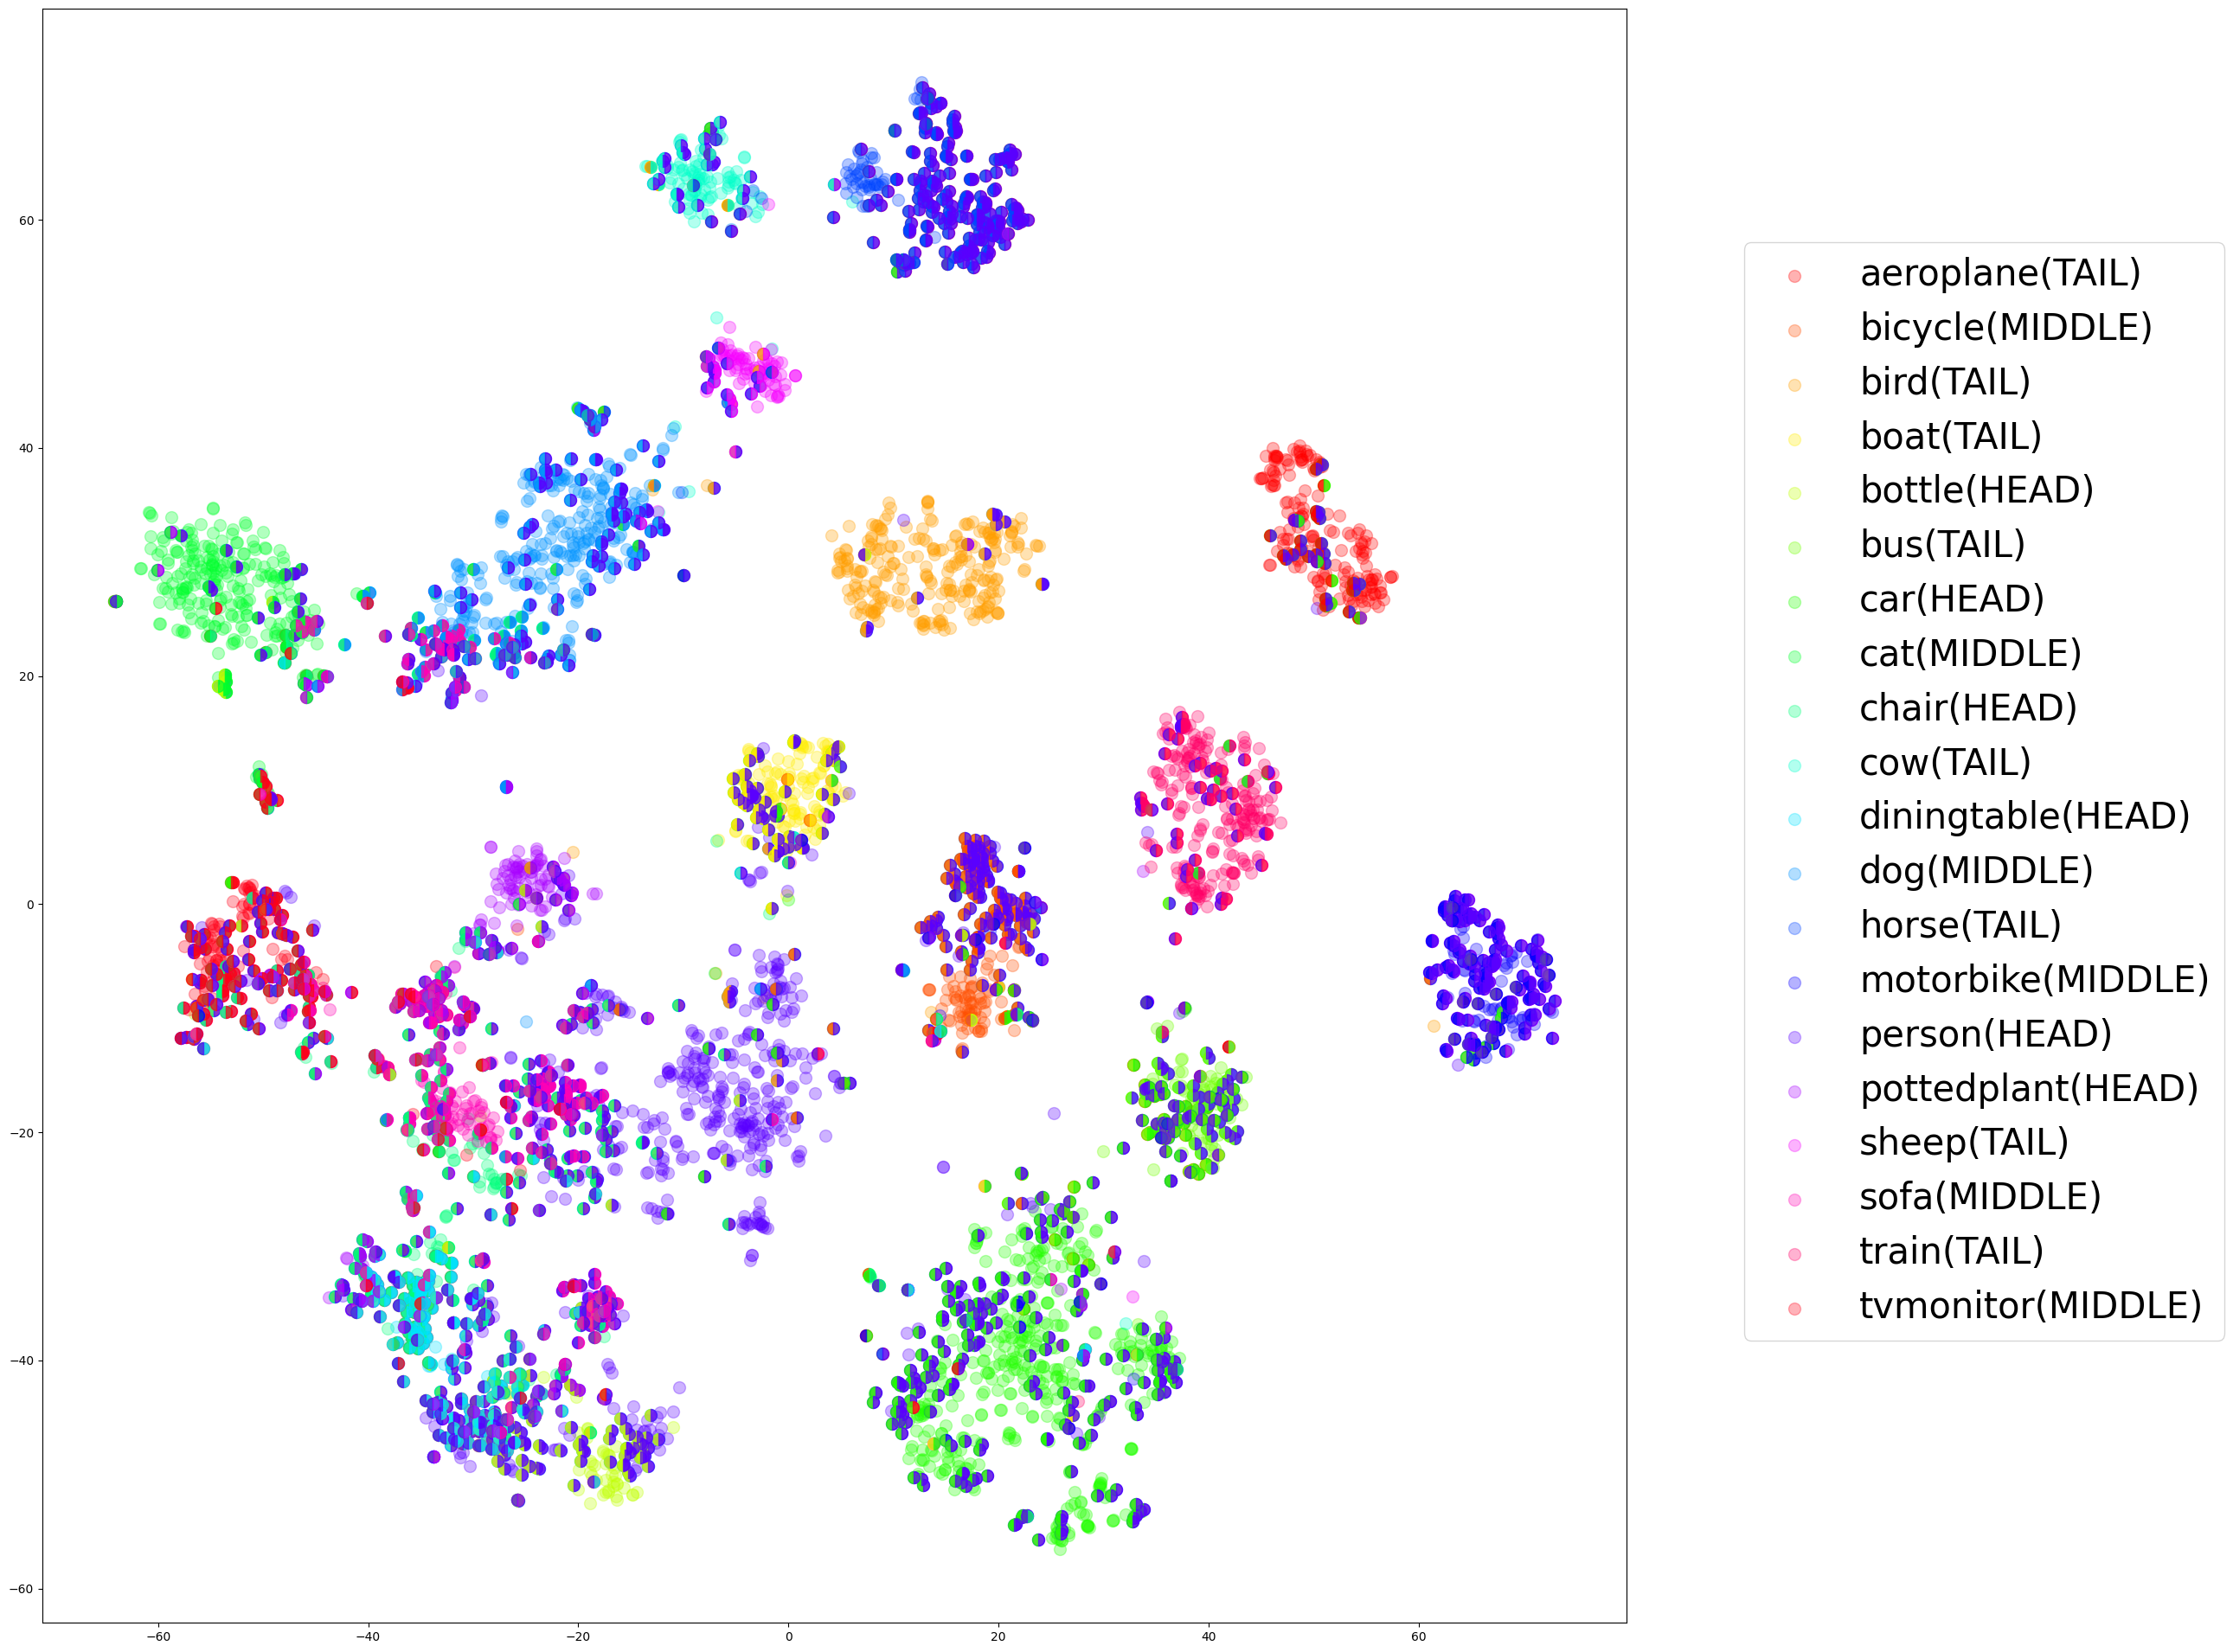

In [35]:
# voc_ours 데이터셋에 대해 플롯 생성
fig, ax = plt.subplots(figsize=(20, 20))
# ax.set_title('Ours', fontsize=20)

# 개별 라벨에 대한 산점도
for label in filtered_labels:
    df_temp = voc_ours[voc_ours['labels'] == label]
    ax.scatter(df_temp['x'], df_temp['y'], marker='o', edgecolor=[c_dict[label]], s = 100,
               c=[c_dict[label]], label=label, alpha=0.3)

# 라벨 조합에 대한 산점도
for r in range(2, len(filtered_labels) + 1):
    for label_combo in combinations(filtered_labels, r):
        combined_label = ','.join(label_combo)
        if combined_label in voc_ours['labels'].unique():
            df_temp = voc_ours[voc_ours['labels'] == combined_label]
            ax.scatter(df_temp['x'], df_temp['y'], edgecolor=[c_dict[label]], s = 100,
                       marker=MarkerStyle('o', fillstyle='full'), alpha=0.7)
            for i, label in enumerate(label_combo):
                ax.scatter(df_temp['x'], df_temp['y'], c=[c_dict[label]], edgecolor=[c_dict[label]], s = 100,
                           marker=MarkerStyle('o', fillstyle=['left', 'right', 'bottom', 'top'][i % 2]), alpha=0.7)

# 범례 추가
handles, labels = ax.get_legend_handles_labels()
legend = fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize=30)
for text in legend.get_texts():
    text.set_color('black')
    text.set_fontsize(30)

plt.tight_layout(rect=[0.05, 0, 1, 0.96])  # subplot 간 간격 조정
plt.savefig('plot_results_voc_all_classes_bal.pdf', bbox_inches='tight')
plt.show()

In [36]:
# # 라벨과 색상 정의
# my_labels = sorted(['cow(TAIL)', 'dog(MIDDLE)', 'person(HEAD)'])
# my_colors = ['red', 'green', 'blue']
# c_dict = {label: color for label, color in zip(my_labels, my_colors)}

# # subplot 생성
# fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# additional_info = {
#     'CLIP': "mAP for multilabel\ncow / person 88.32%\ndog / person 88.57%",
#     'ASL': "mAP for multilabel\ncow / person 90.56%\ndog / person 93.76%",
#     'OURS': "mAP for multilabel\ncow / person 95.14%\ndog / person 95.96%",
# }

# # 전체 데이터에서 x와 y의 최대 및 최소값 찾기
# x_min = min(voc_clip['x'].min(), voc_asl['x'].min(), voc_ours['x'].min())
# x_max = max(voc_clip['x'].max(), voc_asl['x'].max(), voc_ours['x'].max())
# y_min = min(voc_clip['y'].min(), voc_asl['y'].min(), voc_ours['y'].min())
# y_max = max(voc_clip['y'].max(), voc_asl['y'].max(), voc_ours['y'].max())

# # 각 subplot에 대해 데이터 플로팅
# for ax, df, title in zip(axs, [voc_clip, voc_asl, voc_ours], ['CLIP', 'ASL', 'OURS']):
#     ax.set_title(title, fontsize = 20)

#     # 개별 라벨에 대한 산점도
#     for label in my_labels:
#         df_temp = df[df['labels'] == label]
#         ax.scatter(df_temp['x'], df_temp['y'], marker = 'o', edgecolor = [c_dict[label]],
#                    c = [c_dict[label]], label = label, alpha = 0.1)

#     # 라벨 조합에 대한 산점도
#     for r in range(2, len(my_labels) + 1) :
#         for label_combo in combinations(my_labels, r) :
#             combined_label = ','.join(label_combo)
#             if combined_label in df['labels'].unique() :
#                 df_temp = df[df['labels'] == combined_label]
#                 ax.scatter(df_temp['x'], df_temp['y'], edgecolor = 'black',
#                            marker = MarkerStyle('o', fillstyle = 'full'), alpha = 0.7)
#                 for i, label in enumerate(label_combo) :
#                     ax.scatter(df_temp['x'], df_temp['y'], c = [c_dict[label]], edgecolor = 'black',
#                                marker = MarkerStyle('o', fillstyle = ['left', 'right', 'bottom', 'top'][i % 4]), alpha = 0.7)


#     # 텍스트 상자 추가
#     textstr = additional_info[title]
#     props = dict(boxstyle = 'round', facecolor = 'wheat', alpha = 0.5)
#     ax.text(0.95, 0.95, textstr, transform = ax.transAxes, fontsize = 12,
#             horizontalalignment = 'right', verticalalignment = 'top', bbox = props)
        
#     # x와 y축의 스케일을 동일하게 설정
#     ax.set_xlim(x_min, x_max)
#     ax.set_ylim(y_min, y_max)
                    
# # 범례 추가
# handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc = 'upper right', bbox_to_anchor = (1, 1.03))

# plt.tight_layout(rect = [0, 0, 1, 0.96])  # subplot 간 간격 조정
# plt.savefig('plot_results_cow_dog_person.pdf', bbox_inches='tight')
# plt.show()

In [37]:
# # 라벨과 색상 정의
# my_labels = sorted(['dog(MIDDLE)', 'horse(TAIL)', 'person(HEAD)'])
# my_colors = ['green', 'orangered', 'royalblue']
# c_dict = {label: color for label, color in zip(my_labels, my_colors)}
# print(c_dict)

# # subplot 생성
# fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# # additional_info = {
# #     'CLIP': "mAP for multilabel\ndog / person 91.90%\nhorse / person 91.95%\ndog / horse / person 93.64%",
# #     'ASL': "mAP for multilabel\ndog / person 93.97%\nhorse / person 93.74%\ndog / horse / person 94.23%",
# #     'OURS': "mAP for multilabel\ndog / person 95.96%\nhorse / person 95.31%\ndog / horse / person 96.28%",
# # }

# # 전체 데이터에서 x와 y의 최대 및 최소값 찾기
# x_min = min(voc_clip['x'].min(), voc_asl['x'].min(), voc_ours['x'].min())
# x_max = max(voc_clip['x'].max(), voc_asl['x'].max(), voc_ours['x'].max())
# y_min = min(voc_clip['y'].min(), voc_asl['y'].min(), voc_ours['y'].min())
# y_max = max(voc_clip['y'].max(), voc_asl['y'].max(), voc_ours['y'].max())
# # print(x_min, x_max, y_min, y_max)

# # 각 subplot에 대해 데이터 플로팅
# for ax, df, title in zip(axs, [voc_clip, voc_asl, voc_ours], ['CLIP', 'ASL', 'OURS']):
#     ax.set_title(title, fontsize = 20)

#     # 개별 라벨에 대한 산점도
#     for label in my_labels:
#         df_temp = df[df['labels'] == label]
#         ax.scatter(df_temp['x'], df_temp['y'], marker = 'o', edgecolor = [c_dict[label]],
#                    c = [c_dict[label]], label = label, alpha = 0.1)

#     # 라벨 조합에 대한 산점도
#     for r in range(2, len(my_labels) + 1) :
#         for label_combo in combinations(my_labels, r) :
#             combined_label = ','.join(label_combo)
#             if combined_label in df['labels'].unique() :
#                 df_temp = df[df['labels'] == combined_label]
#                 ax.scatter(df_temp['x'], df_temp['y'], edgecolor = [c_dict[label]],
#                            marker = MarkerStyle('o', fillstyle = 'full'), alpha = 0.7)
#                 for i, label in enumerate(label_combo) :
#                     ax.scatter(df_temp['x'], df_temp['y'], c = [c_dict[label]], edgecolor = [c_dict[label]],
#                                marker = MarkerStyle('o', fillstyle = ['left', 'right', 'bottom', 'top'][i % 2]), alpha = 0.7)


# #     # 텍스트 상자 추가
# #     textstr = additional_info[title]
# #     props = dict(boxstyle = 'round', facecolor = 'wheat', alpha = 0.5)
# #     ax.text(0.05, 0.05, textstr, transform = ax.transAxes, fontsize = 12,
# #             horizontalalignment = 'left', verticalalignment = 'bottom', bbox = props)
    
#     # x와 y축의 스케일을 동일하게 설정
#     ax.set_xlim(x_min, x_max)
#     ax.set_ylim(y_min, y_max)
                    

# # 범례 추가
# handles, labels = axs[0].get_legend_handles_labels()
# fig.legend(handles, labels, loc = 'upper right', bbox_to_anchor = (1.00, 1.03))

# # # 두 번째 행에 대한 막대그래프 데이터
# # ap_data = {
# #     'CLIP': [0.9703, 0.9712, 0.8677],
# #     'ASL': [0.9522, 0.9477, 0.9271],
# #     'OURS': [0.9822, 0.9692, 0.9370]
# # }
# # ap_labels = ['dog(MIDDLE)', 'horse(TAIL)', 'person(HEAD)']
# # bar_width = 0.25

# # # 각 막대그래프에 대한 플로팅
# # for i, (title, ap_values) in enumerate(ap_data.items()):
# #     ax = axs[1, i]
# #     ax.bar(np.arange(len(ap_labels)), ap_values, color=['green', 'orange', 'royalblue'], width=bar_width)
# # #     ax.set_title(f'{title} AP', fontsize=20)
# #     ax.set_xticks(np.arange(len(ap_labels)))
# #     ax.set_xticklabels(ap_labels, fontsize=15)
# #     ax.set_ylim(0.85, 1.00)
# #     for j, v in enumerate(ap_values):
# #         ax.text(j, v + 0.01, f"{v:.4f}", color='black', ha='center', fontsize=15)

        
# # # 첫 번째 행의 왼쪽에 문장 추가
# # fig.text(0.02, 0.70, '(a)', fontsize=20, verticalalignment='center')

# # # 두 번째 행의 왼쪽에 문장 추가
# # fig.text(0.02, 0.25, '(b)', fontsize=20, verticalalignment='center')
        
        
# plt.tight_layout(rect = [0.05, 0, 1, 0.96])  # subplot 간 간격 조정
# plt.savefig('plot_results_dog_horse_person.pdf', dpi=1000, bbox_inches='tight')
# plt.show()

In [38]:
# # 필터링 및 정렬된 라벨 추출
# filtered_labels = sorted(single_label_counts.index.tolist())

# # 사용자 정의 색상 팔레트
# custom_colors = ['red', 'coral', 'orange', 'yellow', 'lime', 'green', 'skyblue',
#                  'cyan', 'blue', 'navy', 'violet', 'magenta', 'pink', 'purple',
#                  'brown', 'grey', 'olive', 'teal', 'maroon', 'turquoise']
# cmap = ListedColormap(custom_colors)

# # 라벨과 색상을 매핑합니다.
# c_dict = {label: color for label, color in zip(filtered_labels, custom_colors)}
# print(c_dict)

# # subplot 생성
# fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# # 전체 데이터에서 x와 y의 최대 및 최소값 찾기
# x_min = min(voc_clip['x'].min(), voc_asl['x'].min(), voc_ours['x'].min())
# x_max = max(voc_clip['x'].max(), voc_asl['x'].max(), voc_ours['x'].max())
# y_min = min(voc_clip['y'].min(), voc_asl['y'].min(), voc_ours['y'].min())
# y_max = max(voc_clip['y'].max(), voc_asl['y'].max(), voc_ours['y'].max())
# # print(x_min, x_max, y_min, y_max)

# # 각 subplot에 대해 데이터 플로팅
# for ax, df, title in zip(axs, [voc_clip, voc_asl, voc_ours], ['CLIP', 'ASL', 'OURS']):
#     ax.set_title(title, fontsize = 20)

#     # 개별 라벨에 대한 산점도
#     for label in filtered_labels:
#         df_temp = df[df['labels'] == label]
#         ax.scatter(df_temp['x'], df_temp['y'], marker = 'o', edgecolor = [c_dict[label]],
#                    c = [c_dict[label]], label = label, alpha = 0.1)

#     # 라벨 조합에 대한 산점도
#     for r in range(2, len(filtered_labels) + 1) :
#         for label_combo in combinations(filtered_labels, r) :
#             combined_label = ','.join(label_combo)
#             if combined_label in df['labels'].unique() :
#                 df_temp = df[df['labels'] == combined_label]
#                 ax.scatter(df_temp['x'], df_temp['y'], edgecolor = [c_dict[label]],
#                            marker = MarkerStyle('o', fillstyle = 'full'), alpha = 0.7)
#                 for i, label in enumerate(label_combo) :
#                     ax.scatter(df_temp['x'], df_temp['y'], c = [c_dict[label]], edgecolor = [c_dict[label]],
#                                marker = MarkerStyle('o', fillstyle = ['left', 'right', 'bottom', 'top'][i % 2]), alpha = 0.7)
    
#     # x와 y축의 스케일을 동일하게 설정
#     ax.set_xlim(x_min, x_max)
#     ax.set_ylim(y_min, y_max)
                    

# # 범례 추가
# handles, labels = axs[0].get_legend_handles_labels()
# fig.legend(handles, labels, loc = 'upper right', bbox_to_anchor = (0.97, 1.00))

# plt.tight_layout(rect = [0.05, 0, 1, 0.96])  # subplot 간 간격 조정
# plt.savefig('plot_results_all_classes.pdf', dpi=1000, bbox_inches='tight')
# plt.show()

In [39]:
# # voc_ours 데이터셋에 대해 플롯 생성
# fig, ax = plt.subplots(figsize=(20, 20))
# ax.set_title('CLIP', fontsize=20)

# # 개별 라벨에 대한 산점도
# for label in filtered_labels:
#     df_temp = voc_clip[voc_clip['labels'] == label]
#     ax.scatter(df_temp['x'], df_temp['y'], marker='o', edgecolor=[c_dict[label]],
#                c=[c_dict[label]], label=label, alpha=0.1)

# # 라벨 조합에 대한 산점도
# for r in range(2, len(filtered_labels) + 1):
#     for label_combo in combinations(filtered_labels, r):
#         combined_label = ','.join(label_combo)
#         if combined_label in voc_clip['labels'].unique():
#             df_temp = voc_clip[voc_clip['labels'] == combined_label]
#             ax.scatter(df_temp['x'], df_temp['y'], edgecolor=[c_dict[label]],
#                        marker=MarkerStyle('o', fillstyle='full'), alpha=0.7)
#             for i, label in enumerate(label_combo):
#                 ax.scatter(df_temp['x'], df_temp['y'], c=[c_dict[label]], edgecolor=[c_dict[label]],
#                            marker=MarkerStyle('o', fillstyle=['left', 'right', 'bottom', 'top'][i % 2]), alpha=0.7)

# # # x와 y축의 스케일을 동일하게 설정
# # ax.set_xlim(x_min, x_max)
# # ax.set_ylim(y_min, y_max)

# # 범례 추가
# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles, labels, loc='upper right')

# plt.tight_layout(rect=[0.05, 0, 1, 0.96])  # subplot 간 간격 조정
# plt.savefig('plot_results_voc_all_classes_clip.pdf', bbox_inches='tight')
# plt.show()

In [40]:
# # voc_ours 데이터셋에 대해 플롯 생성
# fig, ax = plt.subplots(figsize=(20, 20))
# ax.set_title('OURS', fontsize=20)

# # 개별 라벨에 대한 산점도
# for label in filtered_labels:
#     df_temp = voc_ours[voc_ours['labels'] == label]
#     ax.scatter(df_temp['x'], df_temp['y'], marker='o', edgecolor=[c_dict[label]],
#                c=[c_dict[label]], label=label, alpha=0.1)

# # 라벨 조합에 대한 산점도
# for r in range(2, len(filtered_labels) + 1):
#     for label_combo in combinations(filtered_labels, r):
#         combined_label = ','.join(label_combo)
#         if combined_label in voc_ours['labels'].unique():
#             df_temp = voc_ours[voc_ours['labels'] == combined_label]
#             ax.scatter(df_temp['x'], df_temp['y'], edgecolor=[c_dict[label]],
#                        marker=MarkerStyle('o', fillstyle='full'), alpha=0.7)
#             for i, label in enumerate(label_combo):
#                 ax.scatter(df_temp['x'], df_temp['y'], c=[c_dict[label]], edgecolor=[c_dict[label]],
#                            marker=MarkerStyle('o', fillstyle=['left', 'right', 'bottom', 'top'][i % 2]), alpha=0.7)

# # # x와 y축의 스케일을 동일하게 설정
# # ax.set_xlim(x_min, x_max)
# # ax.set_ylim(y_min, y_max)

# # 범례 추가
# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles, labels, loc='upper right')

# plt.tight_layout(rect=[0.05, 0, 1, 0.96])  # subplot 간 간격 조정
# plt.savefig('plot_results_voc_all_classes_ours.pdf', bbox_inches='tight')
# plt.show()